In [257]:
import os

# Directory containing the Excel files
directory = "datasets"

# List all files in the directory
files = os.listdir(directory)

# Print the list of files
print(files)


['dataset4.xlsx', 'dataset5.xlsx', 'dataset6.xlsx', 'dataset7.xlsx', 'dataset8.xlsx', 'dataset9.xlsx', 'dataset_1_2_3_combined.xlsx']


In [258]:
import pandas as pd
# Directory containing the Excel files
directory = "datasets"

# List to store data from each Excel file
data_frames = []

# Loop through all files in the directory
for file in os.listdir(directory):
    if file.endswith(".xlsx") or file.endswith(".xls"):
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)  # Read each Excel file into a DataFrame
        
        # Clean the column names by removing leading/trailing spaces and standardizing them
        df.columns = df.columns.str.strip()  # Strip any leading/trailing spaces
        df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
        df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)  # Remove any non-alphanumeric characters

        # Append the DataFrame to the list
        data_frames.append(df)

# Combine all DataFrames into one
combo = pd.concat(data_frames, ignore_index=True)

# Print the cleaned and combined DataFrame
print(combo)


             ID              Name               Role  \
0       uppaup1       Alice Smith  Software Engineer   
1       uppaup2        Hank Brown  Software Engineer   
2       uppaup3         Bob Jones     Data Scientist   
3       uppaup4        Bob Miller  Software Engineer   
4       uppaup5         Ivy Jones      Data Engineer   
...         ...               ...                ...   
3169   ananba44     ananya bansal      data engineer   
3170  diyasi576        diya singh    product manager   
3171  harska507  harshitha kapoor        ui engineer   
3172  kabich225      kabir chopra  software engineer   
3173  aditsi182      aditya singh  software engineer   

                                             Transcript  \
0     Here's a simulated interview for a Software En...   
1     Here's a simulated interview for a Software En...   
2     Here's a simulated interview for a Data Scient...   
3     Here's a simulated interview for a Software En...   
4     Here's a simulated intervi

In [259]:
print(combo.columns.tolist())

['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason_for_decision', 'Job_Description', 'num_words_in_transcript']


In [260]:
print("Data Information:")
combo.info()
# Display the first few rows of the data
combo.head()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       3174 non-null   object
 1   Name                     3174 non-null   object
 2   Role                     3174 non-null   object
 3   Transcript               3174 non-null   object
 4   Resume                   3174 non-null   object
 5   decision                 3174 non-null   object
 6   Reason_for_decision      3174 non-null   object
 7   Job_Description          3174 non-null   object
 8   num_words_in_transcript  3174 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 223.3+ KB


,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,528
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,804
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,503
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,665
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,573


In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

Missing Data:
 ID                         0
Name                       0
Role                       0
Transcript                 0
Resume                     0
decision                   0
Reason_for_decision        0
Job_Description            0
num_words_in_transcript    0
dtype: int64


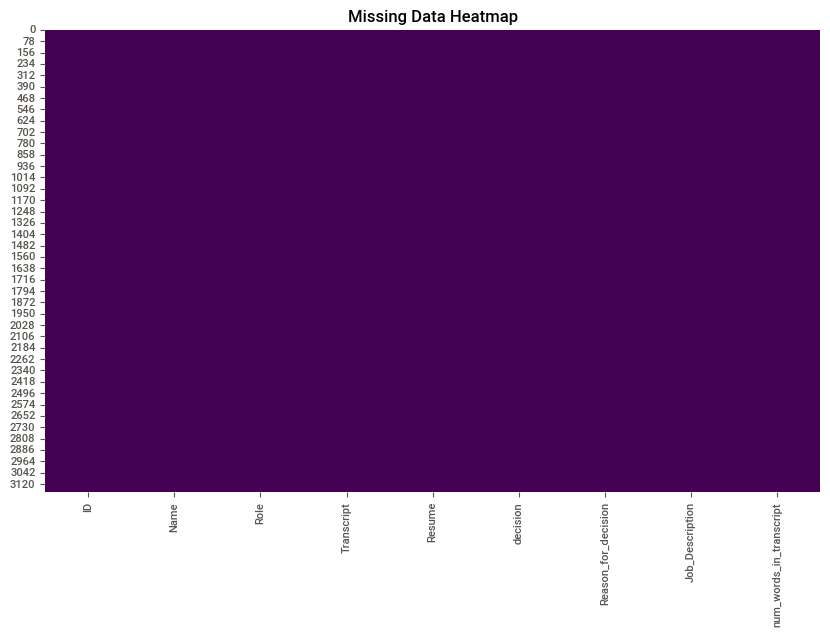

In [262]:
# Check for missing values in each column
missing_data = combo.isnull().sum()
print("Missing Data:\n", missing_data)

# Visualize missing data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combo.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [263]:
# Check for duplicate rows
duplicates = combo.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If needed, you can drop duplicates
combo = combo.drop_duplicates()


Number of duplicate rows: 0


In [264]:
# Statistical summary of numeric columns
print("Statistical Summary:")
print(combo.describe())


Statistical Summary:
       num_words_in_transcript
count              3174.000000
mean                676.577820
std                 139.509325
min                  62.000000
25%                 574.000000
50%                 679.000000
75%                 773.000000
max                1195.000000


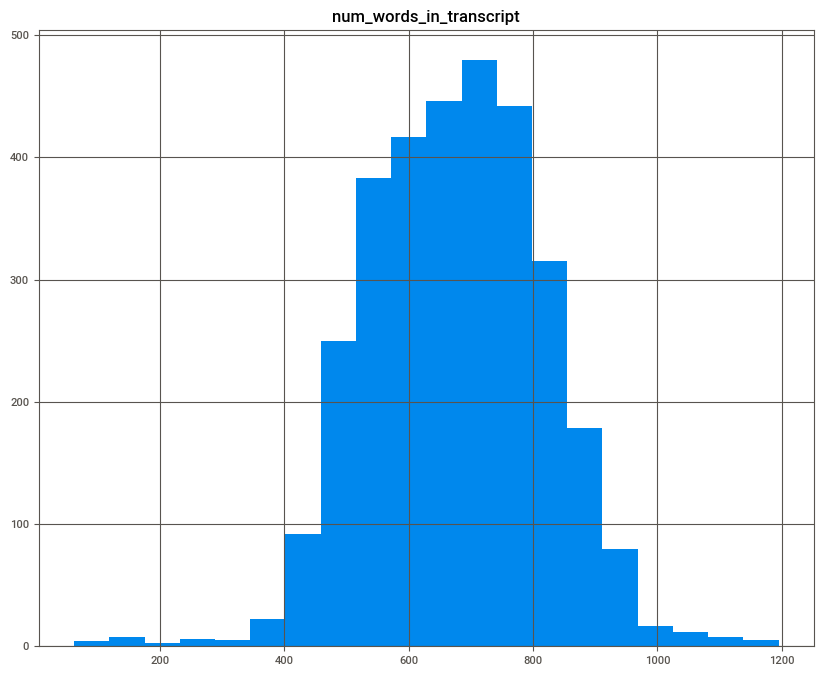

In [265]:
# Distribution of numerical columns
combo.hist(bins=20, figsize=(10, 8))
plt.show()


In [266]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Unique Values in 'Decision' Column:
decision
reject    1609
select    1565
Name: count, dtype: int64


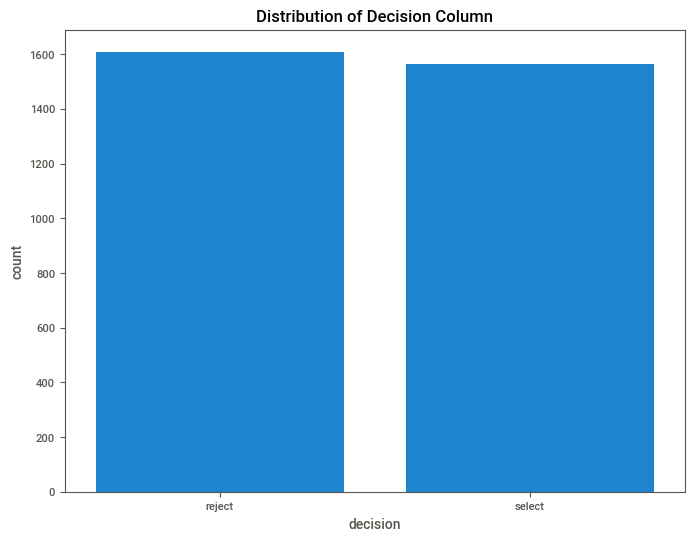

In [267]:
# Check unique values in 'decision' column (if it's categorical)
print("Unique Values in 'Decision' Column:")
print(combo['decision'].value_counts())

# Bar plot for categorical features (e.g., decision column)
plt.figure(figsize=(8, 6))
sns.countplot(x='decision', data=combo)
plt.title("Distribution of Decision Column")
plt.show()


In [268]:
from textblob import TextBlob

In [269]:
# Example: Create a feature for sentiment score from a "Transcript" (using a sentiment analysis model)
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

combo['sentiment_score'] = combo['Transcript'].apply(get_sentiment_score)



In [270]:
print(combo.columns.tolist())

['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision', 'Reason_for_decision', 'Job_Description', 'num_words_in_transcript', 'sentiment_score']


In [271]:
combo.head()

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,sentiment_score
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,528,0.233818
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,804,0.310188
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,503,0.107012
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,665,0.265914
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,573,0.183981


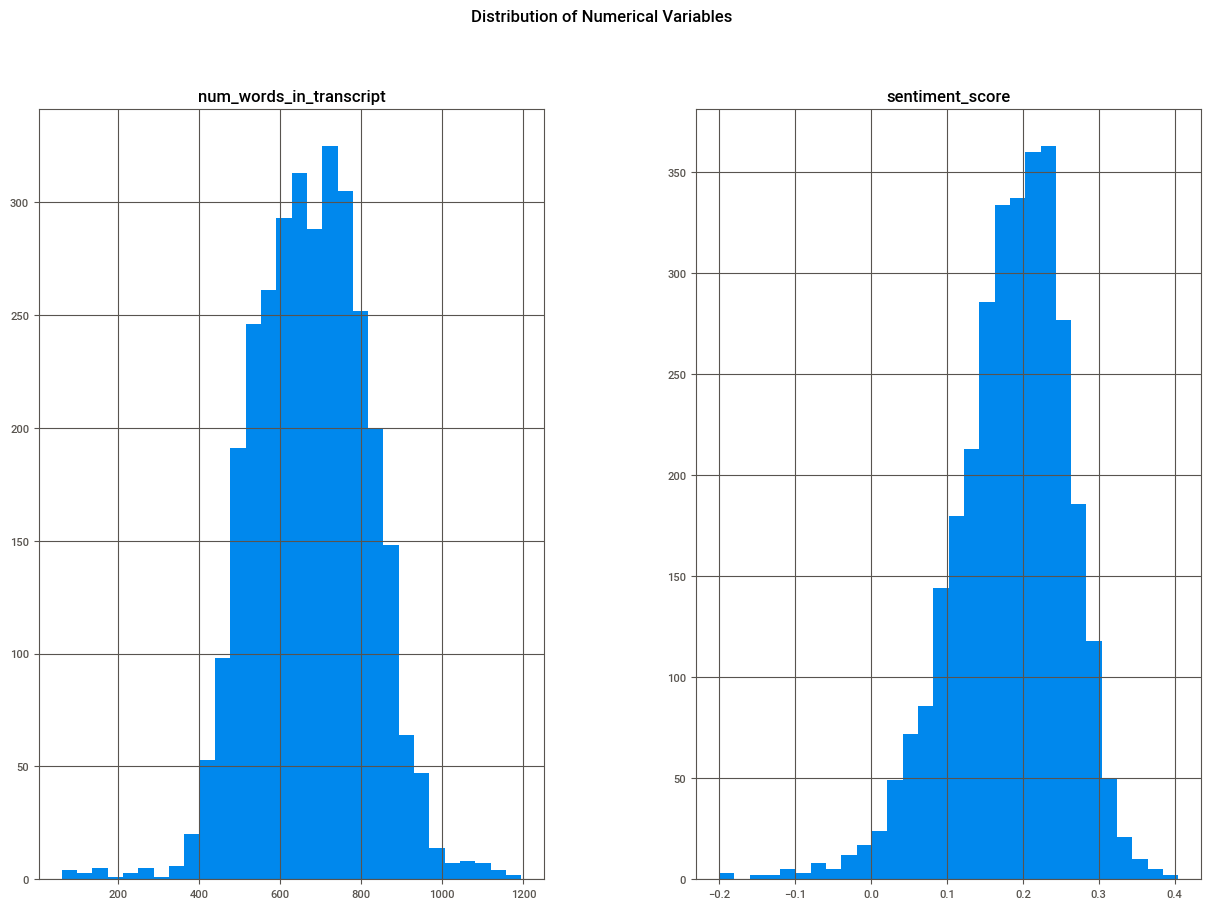

In [272]:
# Distribution of numerical features
combo.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Variables")
plt.show()


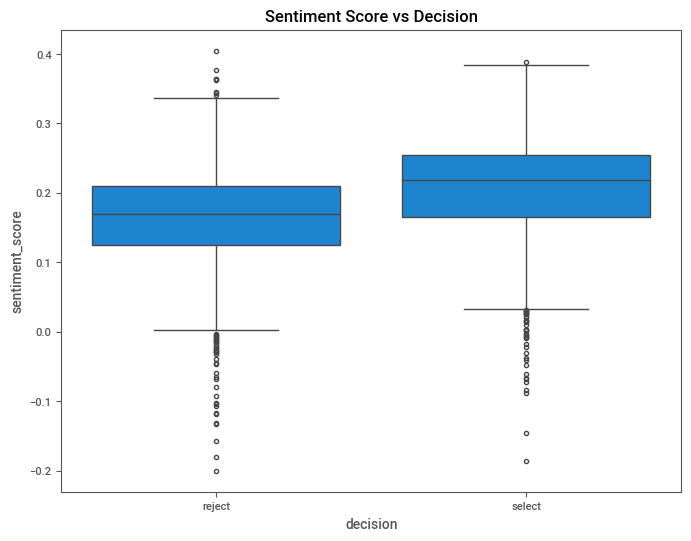

In [273]:
# Sentiment vs Decision (for cultural fit analysis)
plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='sentiment_score', data=combo)
plt.title("Sentiment Score vs Decision")
plt.show()


In [274]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


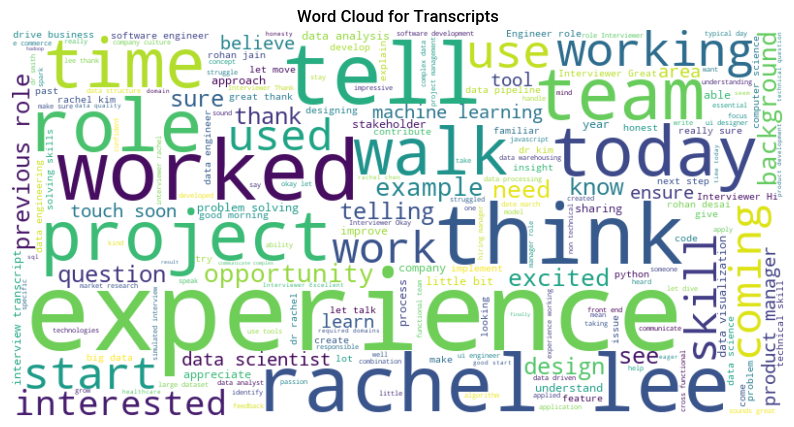

In [275]:
from wordcloud import WordCloud

# Generate word cloud for 'Transcript' column
text = ' '.join(combo['Transcript'].dropna())  # Join all transcripts into one large string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Transcripts")
plt.show()


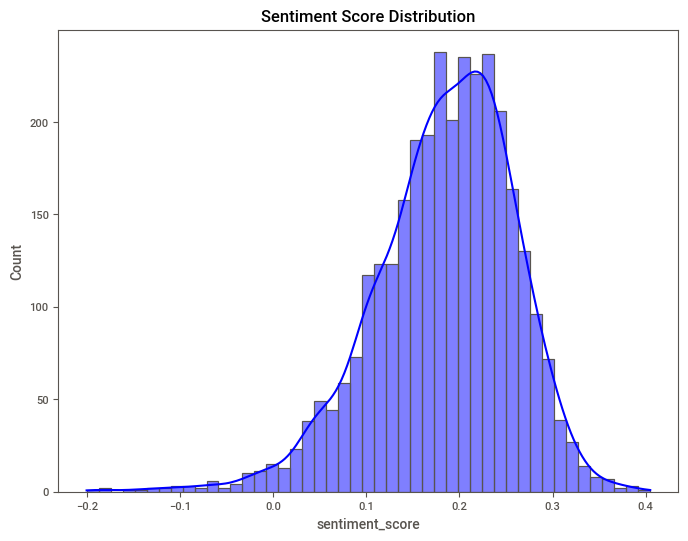

In [276]:
# Plotting sentiment polarity distribution from the 'Transcript' column
plt.figure(figsize=(8, 6))
sns.histplot(combo['sentiment_score'], kde=True, color='blue')
plt.title("Sentiment Score Distribution")
plt.show()


Unique Values in 'Role' Column:
Role
data engineer                   307
software engineer               307
product manager                 303
Data Scientist                  292
data scientist                  287
Software Engineer               225
Product Manager                 203
Data Engineer                   192
data analyst                    183
ui designer                     155
UI Engineer                     147
ui engineer                     132
Data Analyst                     78
UI Designer                      71
Software Developer               66
Project Manager                  56
Network Engineer                 16
DevOps Engineer                  16
Graphic Designer                 15
Digital Marketing Specialist     14
Machine Learning Engineer        13
AI Engineer                      13
HR Specialist                    12
Business Analyst                 11
Game Developer                   10
Database Administrator            9
Cybersecurity Specialist   

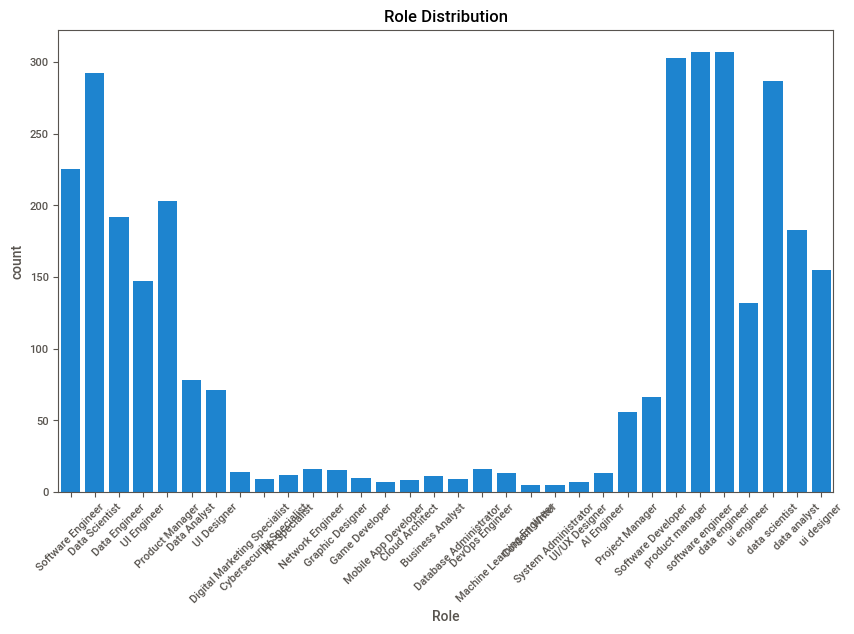

In [277]:
# Value counts for categorical features
print("Unique Values in 'Role' Column:")
print(combo['Role'].value_counts())

print("Unique Values in 'decision' Column:")
print(combo['decision'].value_counts())

# Plotting the distribution of categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='Role', data=combo)
plt.title("Role Distribution")
plt.xticks(rotation=45)
plt.show()



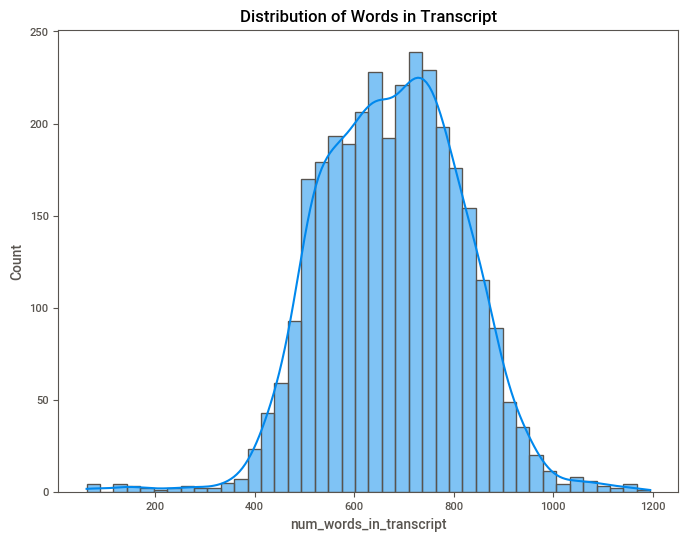

In [278]:
# Plot the distribution of 'num_words_in_transcript'
plt.figure(figsize=(8, 6))
sns.histplot(combo['num_words_in_transcript'], kde=True)
plt.title("Distribution of Words in Transcript")
plt.show()


In [279]:
>>> import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

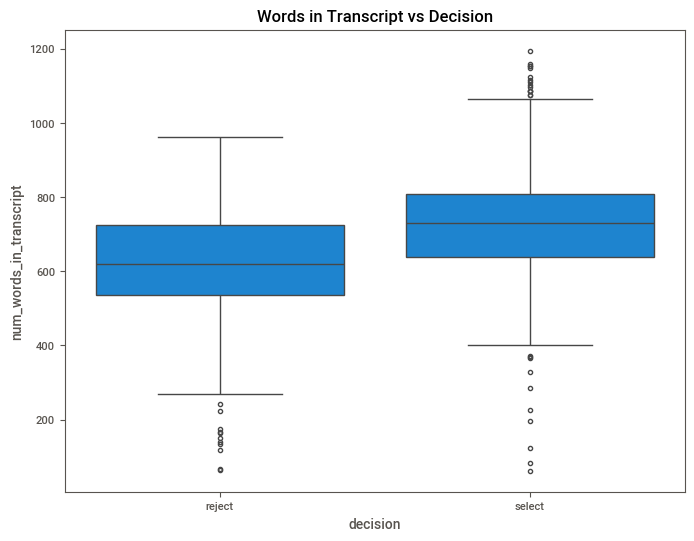

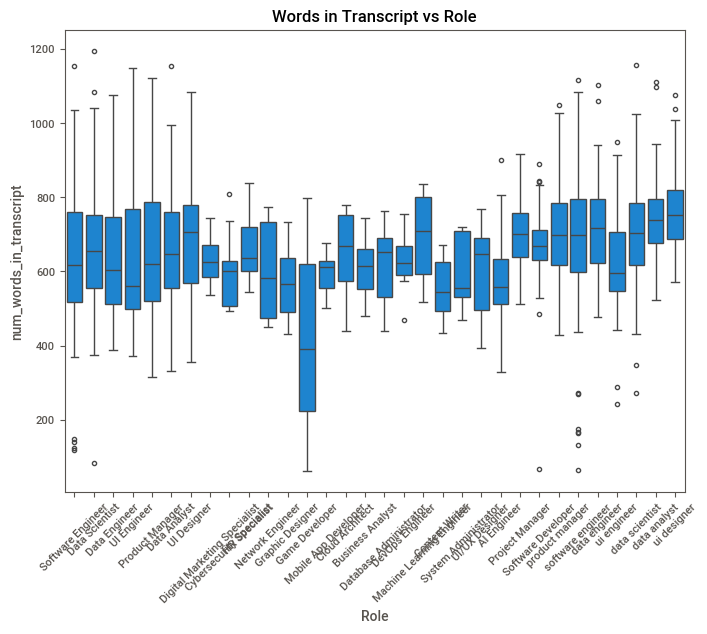

In [280]:
# Analyze 'num_words_in_transcript' with respect to 'decision'
plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='num_words_in_transcript', data=combo)
plt.title("Words in Transcript vs Decision")
plt.show()

# Analyze 'num_words_in_transcript' with respect to 'Role'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Role', y='num_words_in_transcript', data=combo)
plt.title("Words in Transcript vs Role")
plt.xticks(rotation=45)
plt.show()


Crosstab between 'Role' and 'decision':
decision                      reject  select
Role                                        
AI Engineer                        5       8
Business Analyst                   5       6
Cloud Architect                    4       4
Content Writer                     3       2
Cybersecurity Specialist           6       3
Data Analyst                      41      37
Data Engineer                    103      89
Data Scientist                   140     152
Database Administrator             3       6
DevOps Engineer                    4      12
Digital Marketing Specialist       5       9
Game Developer                     3       7
Graphic Designer                   8       7
HR Specialist                      6       6
Machine Learning Engineer          6       7
Mobile App Developer               4       3
Network Engineer                   9       7
Product Manager                  101     102
Project Manager                   24      32
Software Develo

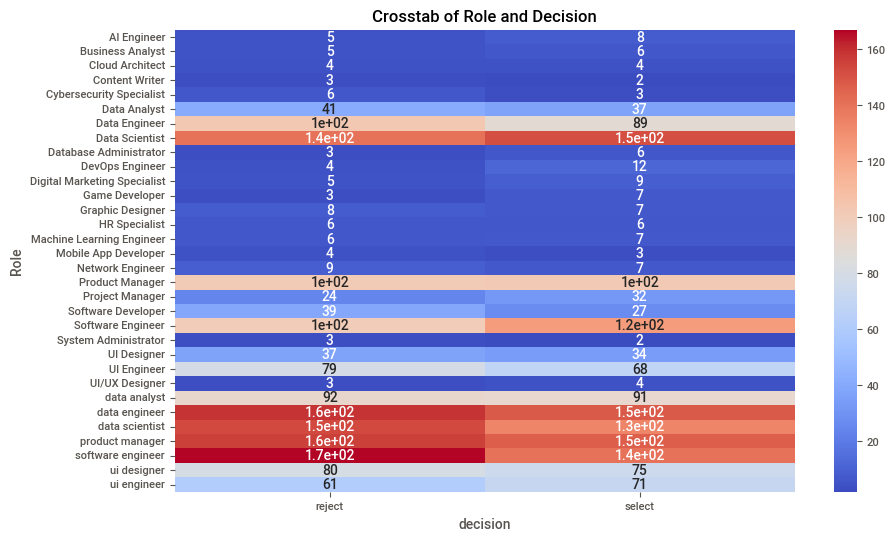

In [281]:
# Create a crosstab between 'Role' and 'decision'
cross_tab_role_decision = pd.crosstab(combo['Role'], combo['decision'])
print("Crosstab between 'Role' and 'decision':")
print(cross_tab_role_decision)

# Visualize the crosstab as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_role_decision, annot=True, cmap='coolwarm')
plt.title("Crosstab of Role and Decision")
plt.show()


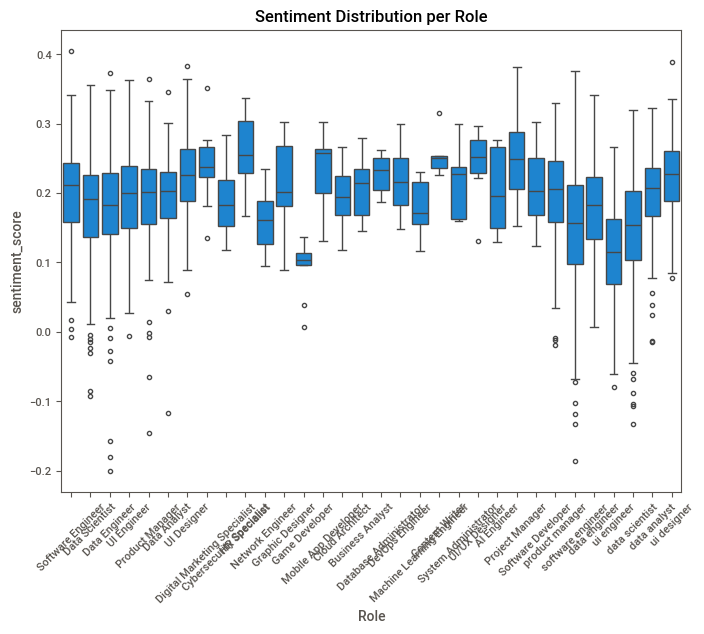

In [282]:
# Assuming you have a sentiment score for each transcript
plt.figure(figsize=(8, 6))
sns.boxplot(x='Role', y='sentiment_score', data=combo)
plt.title("Sentiment Distribution per Role")
plt.xticks(rotation=45)
plt.show()



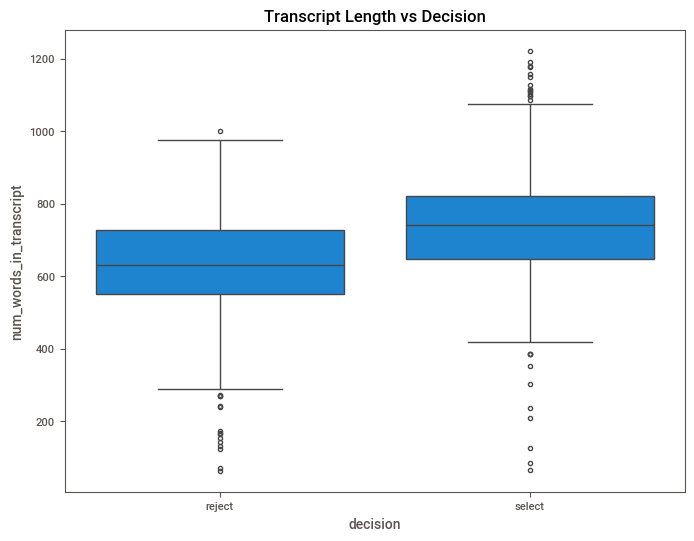

In [283]:
# Add a new feature for transcript length (word count)
combo['num_words_in_transcript'] = combo['Transcript'].apply(lambda x: len(str(x).split()))

# Boxplot showing transcript length by decision
plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='num_words_in_transcript', data=combo)
plt.title("Transcript Length vs Decision")
plt.show()


In [284]:
combo.head(10)

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,sentiment_score
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,545,0.233818
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,829,0.310188
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,517,0.107012
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,685,0.265914
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,590,0.183981
5,uppaup6,Frank Brown,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Frank Brown:\n\n**F...,reject,Lack of enthusiasm or motivation.,Here is a sample job description for a Data En...,478,0.124286
6,uppaup7,Charlie Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Charlie Miller, a s...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,849,0.173108
7,uppaup8,Charlie Jones,Data Engineer,Here's a simulated interview for a Data Engine...,"Here's a sample resume for Charlie Jones, a Da...",select,Relevant skills and experience.,Here is a sample job description for a Data En...,869,0.252662
8,uppaup9,Bob Moore,UI Engineer,Here's a simulated interview for a UI Engineer...,Here's a sample resume for Bob Moore:\n\n**Bob...,reject,Lack of enthusiasm or motivation.,Here is a job description for a UI Engineer:\n...,561,0.302422
9,uppaup10,Bob Brown,Data Scientist,Here's a simulated interview for a Data Scient...,Here's a sample resume for Bob Brown:\n\n**Bob...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data Sc...,640,0.175192


In [285]:
import plotly.express as px

# Role Distribution
fig = px.histogram(combo, x="Role", color="decision", title="Role Distribution by Decision")
fig.show()

# Decision Distribution
fig = px.pie(combo, names="decision", title="Decision Distribution")
fig.show()


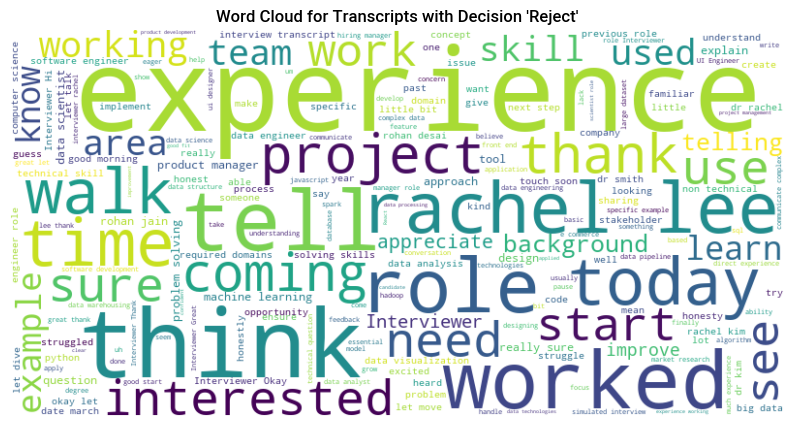

In [286]:
# Transcript and reject
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where the decision is "reject"
rejected_transcripts = combo[combo['decision'] == 'reject']['Transcript'].dropna()

# Combine all transcripts into a single string
text = ' '.join(rejected_transcripts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Transcripts with Decision 'Reject'")
plt.show()


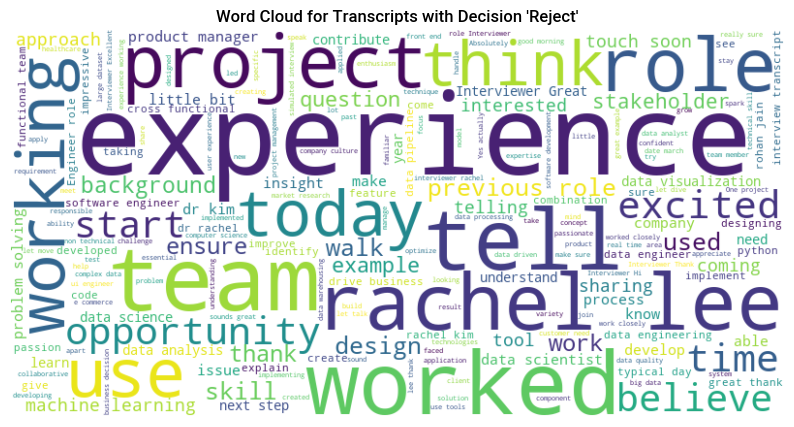

In [287]:
# Transcript and Select
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where the decision is "select"
rejected_transcripts = combo[combo['decision'] == 'select']['Transcript'].dropna()

# Combine all transcripts into a single string
text = ' '.join(rejected_transcripts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Transcripts with Decision 'Reject'")
plt.show()


In [288]:
from plotly.graph_objs import Scatter, Layout

# Generate a word cloud for 'Transcript' using Plotly
fig = px.scatter(
    combo,
    x='ID',  # Use ID for better differentiation
    y='num_words_in_transcript',
    size='num_words_in_transcript',
    color='decision',
    hover_name='Name',
    title="Interactive Word Cloud Visualization"
)
fig.show()


In [289]:
import plotly.express as px

# Plot sentiment scores, assuming 'sentiment_score' is the correct column
fig = px.histogram(combo, x="sentiment_score", color="decision", title="Sentiment Distribution by Decision")
fig.show()


In [290]:
combo.head()

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,sentiment_score
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,545,0.233818
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,829,0.310188
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,517,0.107012
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,685,0.265914
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,590,0.183981


In [291]:
pip install transformer

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [292]:
#for reject
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming combo['Transcript'] contains the transcripts
# Filter transcripts with the term "decision" or "reject"
filtered_transcripts = combo['Transcript'].dropna().str.contains(r'\b(decision|reject)\b', case=False)

# Extract relevant transcripts
relevant_transcripts = combo['Transcript'][filtered_transcripts]

# Vectorize the relevant transcripts
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(relevant_transcripts)

# Print all features (terms) in the relevant transcripts
print(vectorizer.get_feature_names_out())


C:\Users\yalla\AppData\Local\Temp\ipykernel_10268\1476297737.py:6: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



['about' 'also' 'an' 'analysis' 'and' 'any' 'approach' 'are' 'as'
 'background' 'be' 'business' 'but' 'by' 'can' 'coming' 'company'
 'complex' 'customer' 'data' 'decision' 'design' 'do' 'don' 'dr' 'example'
 'experience' 'for' 'from' 'good' 'great' 'had' 'have' 'how' 'in'
 'insights' 'interview' 'interviewer' 'is' 'it' 'kim' 'learning' 'lee'
 'let' 'like' 'll' 'machine' 'manager' 'me' 'more' 'my' 'not' 'of' 'on'
 'or' 'our' 'problem' 'process' 'product' 'project' 'questions' 'rachel'
 're' 'really' 'role' 'skills' 'some' 'stakeholders' 'start' 'sure' 'team'
 'technical' 'tell' 'thank' 'that' 'the' 'think' 'this' 'through' 'time'
 'to' 'today' 'tools' 'use' 'used' 'using' 've' 'walk' 'was' 'we' 'well'
 'what' 'when' 'with' 'work' 'worked' 'working' 'would' 'you' 'your']


In [293]:
#for select
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming combo['Transcript'] contains the transcripts
# Filter transcripts with the term "decision" or "select"
filtered_transcripts = combo['Transcript'].dropna().str.contains(r'\b(decision|select)\b', case=False)

# Extract relevant transcripts
relevant_transcripts = combo['Transcript'][filtered_transcripts]

# Vectorize the relevant transcripts
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(relevant_transcripts)

# Print all features (terms) in the relevant transcripts
print(vectorizer.get_feature_names_out())


C:\Users\yalla\AppData\Local\Temp\ipykernel_10268\4220064417.py:6: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



['about' 'also' 'an' 'analysis' 'and' 'any' 'approach' 'are' 'as'
 'background' 'be' 'business' 'but' 'by' 'can' 'company' 'complex'
 'customer' 'data' 'decision' 'design' 'do' 'don' 'dr' 'example'
 'experience' 'for' 'from' 'good' 'great' 'had' 'have' 'how' 'in'
 'insights' 'interview' 'interviewer' 'is' 'it' 'kim' 'learning' 'lee'
 'let' 'like' 'll' 'machine' 'manager' 'me' 'more' 'my' 'not' 'of' 'on'
 'or' 'our' 'problem' 'process' 'product' 'project' 'projects' 'questions'
 'rachel' 're' 'really' 'role' 'skills' 'some' 'stakeholders' 'start'
 'sure' 'team' 'technical' 'tell' 'thank' 'that' 'the' 'think' 'this'
 'through' 'time' 'to' 'today' 'tools' 'use' 'used' 'using' 've' 'walk'
 'was' 'we' 'well' 'what' 'when' 'with' 'work' 'worked' 'working' 'would'
 'you' 'your']


In [294]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize Vader
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment
combo['vader_sentiment'] = combo['Transcript'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

print(combo[['Transcript', 'vader_sentiment']])


                                             Transcript  vader_sentiment
0     Here's a simulated interview for a Software En...           0.9975
1     Here's a simulated interview for a Software En...           0.9996
2     Here's a simulated interview for a Data Scient...           0.9962
3     Here's a simulated interview for a Software En...           0.9982
4     Here's a simulated interview for a Data Engine...           0.9956
...                                                 ...              ...
3169  here's a realistic interview transcript for th...           0.9987
3170  interview transcript for product manager role\...           0.9992
3171  interviewer: hi harshitha, thanks for coming i...           0.9996
3172  here's a realistic interview transcript for ka...           0.9986
3173  interview transcript\n\ninterviewer: hi aditya...           0.9974

[3174 rows x 2 columns]


In [295]:
combo.head()

,ID,Name,Role,Transcript,Resume,decision,Reason_for_decision,Job_Description,num_words_in_transcript,sentiment_score,vader_sentiment
0,uppaup1,Alice Smith,Software Engineer,Here's a simulated interview for a Software En...,Here's a sample resume for Alice Smith:\n\n**A...,reject,Unsatisfactory references or background check.,Here is a comprehensive job description for a ...,545,0.233818,0.9975
1,uppaup2,Hank Brown,Software Engineer,Here's a simulated interview for a Software En...,"Here's a resume for Hank Brown, a select candi...",select,Growth mindset and adaptability.,Here is a job description for a Software Engin...,829,0.310188,0.9996
2,uppaup3,Bob Jones,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a sample resume for Bob Jones, who appl...",reject,Inadequate communication or interpersonal skills.,Here is a comprehensive job description for a ...,517,0.107012,0.9962
3,uppaup4,Bob Miller,Software Engineer,Here's a simulated interview for a Software En...,"Here's a sample resume for Bob Miller, a Softw...",select,Strong cultural fit.,Here is a sample job description for a Softwar...,685,0.265914,0.9982
4,uppaup5,Ivy Jones,Data Engineer,Here's a simulated interview for a Data Engine...,Here's a sample resume for Ivy Jones:\n\n**Ivy...,reject,Lack of relevant skills or experience.,Here is a sample job description for a Data En...,590,0.183981,0.9956


   vader_sentiment  sentiment_score
0           0.9975         0.233818
1           0.9996         0.310188
2           0.9962         0.107012
3           0.9982         0.265914
4           0.9956         0.183981
Correlation between vader_sentiment and sentiment_score: 0.15029330661583856

Summary Statistics for vader_sentiment:
count    3174.000000
mean        0.995829
std         0.037076
min        -0.838400
25%         0.997100
50%         0.998500
75%         0.999100
max         0.999800
Name: vader_sentiment, dtype: float64

Summary Statistics for sentiment_score:
count    3174.000000
mean        0.183804
std         0.075210
min        -0.200292
25%         0.140227
50%         0.191183
75%         0.236300
max         0.404808
Name: sentiment_score, dtype: float64


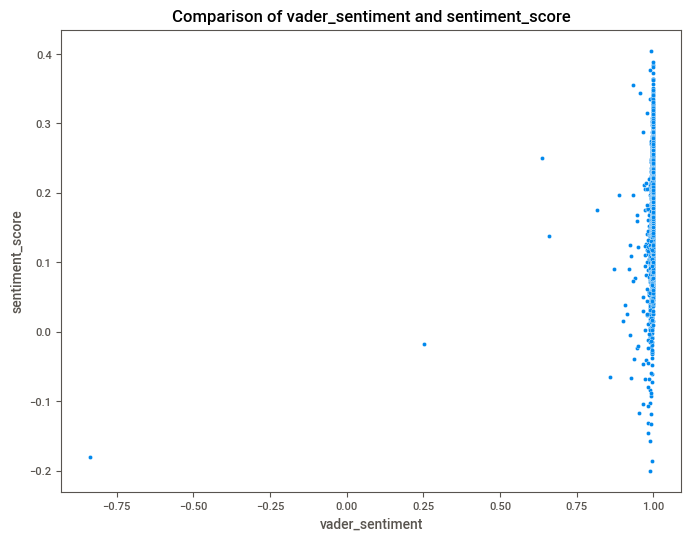

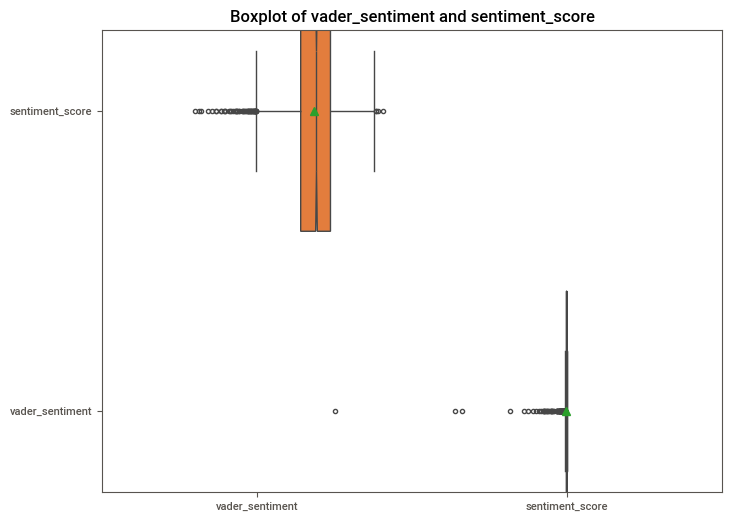

In [296]:

# Assuming combined_df contains the 'vader_sentiment' and 'sentiment_score' columns

# Check data types and inspect the first few rows
print(combo[['vader_sentiment', 'sentiment_score']].head())

# If the columns are numerical, you can calculate their correlation
correlation = combo['vader_sentiment'].corr(combo['sentiment_score'])
print(f"Correlation between vader_sentiment and sentiment_score: {correlation}")

# Calculate summary statistics
vader_summary = combo['vader_sentiment'].describe()
sentiment_summary = combo['sentiment_score'].describe()

print("\nSummary Statistics for vader_sentiment:")
print(vader_summary)

print("\nSummary Statistics for sentiment_score:")
print(sentiment_summary)

# Visualize the comparison between the two columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=combo['vader_sentiment'], y=combo['sentiment_score'])
plt.title('Comparison of vader_sentiment and sentiment_score')
plt.xlabel('vader_sentiment')
plt.ylabel('sentiment_score')
plt.show()

# Optionally, create a side-by-side boxplot for further comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=[combo['vader_sentiment'], combo['sentiment_score']], 
            notch=True, 
            vert=False, 
            patch_artist=True, 
            showmeans=True)
plt.yticks([0, 1], ['vader_sentiment', 'sentiment_score'])
plt.title('Boxplot of vader_sentiment and sentiment_score')
plt.show()
